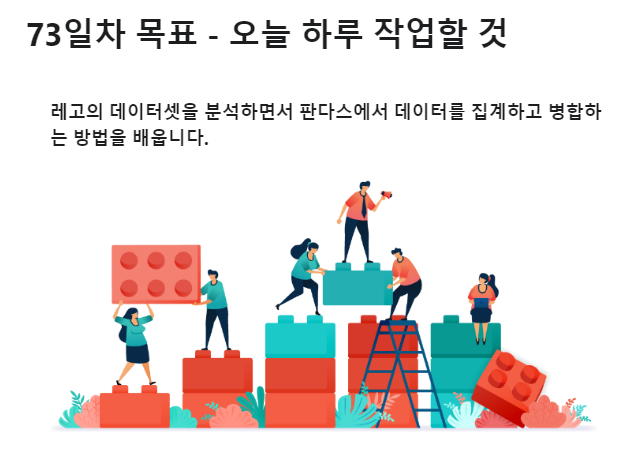

|

- 레고 데이터셋
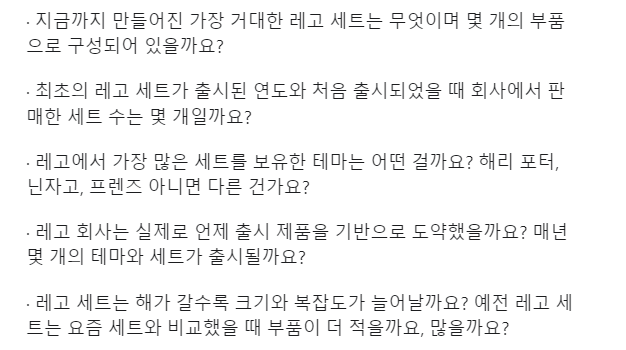



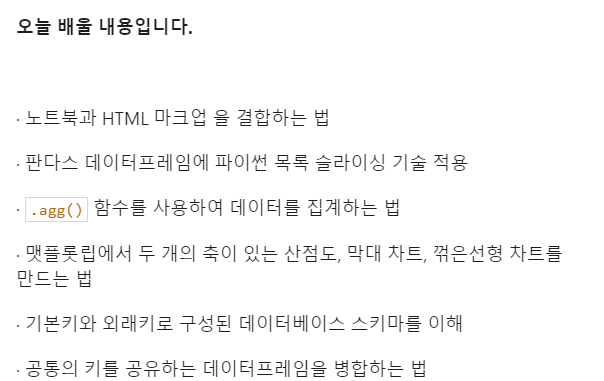


## `612강`
노트북을 보기 좋게 만드는 HTML 마크다운 사용

- 이미지 추가하기

<img src="https://i.imgur.com/49FNOHj.jpg">

<img src="assets/bricks.jpg">

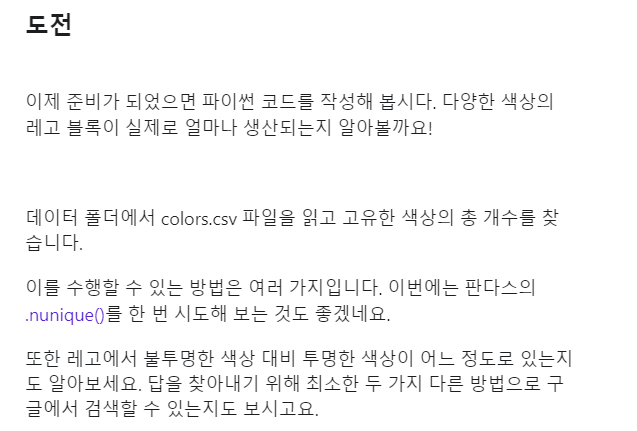

In [9]:
import os
os.listdir('data')

['.DS_Store', 'colors.csv', 'sets.csv', 'themes.csv']

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('data/colors.csv')
data

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [12]:
color_df = data.copy()

In [13]:
color_df['name'].nunique()

135

In [14]:
color_df['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

## `613강`
해설: 레고 블록 색상 탐색하기

In [15]:
color_df.head(5)

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [16]:
color_df['name'].nunique()

135

-> 레고 블록에 135개의 고유한 색상 존재

**투명한 색상의 개수 구하기**

In [17]:
color_df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [18]:
color_df['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

**도전** 
- 노트북 이미지 작업 편집

In [21]:
os.listdir('assets')

['.DS_Store',
 'bricks.jpg',
 'lego_sets.png',
 'lego_themes.png',
 'rebrickable_schema.png']

### **UnderStanding LEGO Themes vs. LEGO Sest** 

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="assets/lego_themes.png">

A logo **set** is a particular box of LEGO or product. Therefore, a single theme typically has have many different sets.

<img src='assets/lego_sets.png'>

## `614강`
가장 오래되고 가장 큰 레고 세트 찾기

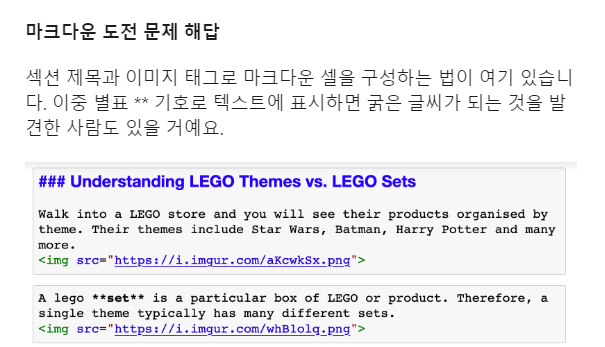

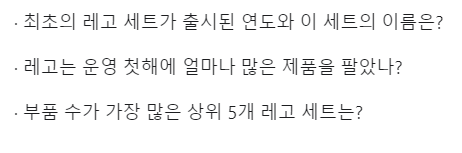

In [22]:
sets = pd.read_csv('data/sets.csv')
sets.head(3)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0


In [23]:
set_df = sets.copy()

- set_num : 고유번호
- name : 세트이름
- year : 출시연도
- theme_id : 테마 이름에 대한 코드
- num_parts : 부픔 개수

    * 첫 번째 레고 세트가 출시된 연도

In [24]:
set_df.sort_values(by='year')

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
...,...,...,...,...,...
11289,75290-1,Mos Eisley Cantina,2020,158,0
5147,41430-1,Summer Fun Water Park,2020,494,1012
11337,75550-1,Minions Kung Fu Battle,2021,689,0
11335,75547-1,Minion Pilot in Training,2021,689,0


In [29]:
set_df.sort_values(by='year')[:1][['set_num','year']]

,set_num,year
9521,700.1-1,1949


    * 출시 첫 해 회사가 몇 가지 제품을 판매? 

In [33]:
set_df[set_df['year']==1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [35]:
set_df[set_df['year']==1949].value_counts()

set_num  name                               year  theme_id  num_parts
700.B-1  Small Doors and Windows Set (ABB)  1949  371       12           1
700.A-1  Small Brick Set (ABB)              1949  371       24           1
700.3-1  Medium Gift Set (ABB)              1949  365       142          1
700.2-1  Large Gift Set (ABB)               1949  365       178          1
700.1-1  Extra-Large Gift Set (ABB)         1949  365       142          1
dtype: int64

    * 가장 많은 부품을 가진 레고 세트

In [34]:
set_df.sort_values(by='num_parts', ascending=False)[:5]

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


## `615강`
시간 변화에 따른 출시 세트 수를 시각화하기

In [47]:
sets_by_year = set_df.groupby('year').count()
sets_by_year['set_num']

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64

In [48]:
sets_by_year['set_num'].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

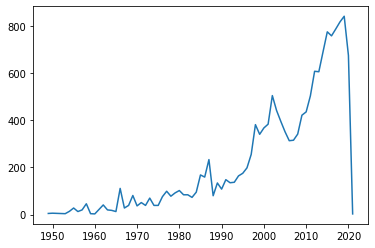

In [53]:
plt.plot(sets_by_year.index, sets_by_year['set_num']);

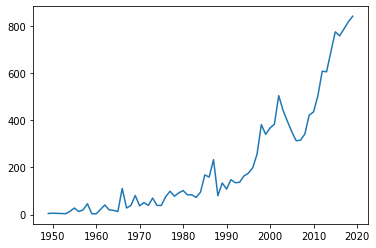

In [57]:
plt.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2]);

    - 레고는 처음 45여 년간 제공하는 제품을 꾸준히 증가시켰지만, 실제로 회사에서 생산한 세트 수가 급격히 증가한 것은 1990년에 중반
    - 차트에서 2000년대 초반 잠시 하락했고, 2005년경 강한 회복을 보여준 것을 확인할 수 있음

## `616강`
판다스 .agg() 함수 사용법

In [59]:
themes_by_year = set_df.groupby('year').agg({'theme_id':pd.Series.nunique})
themes_by_year

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


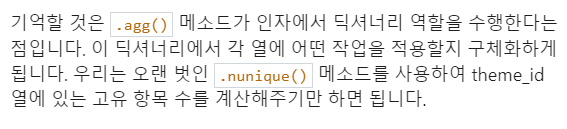

In [61]:
themes_by_year = set_df.groupby('year').agg({'theme_id' : pd.Series.nunique})
themes_by_year.rename(columns = {'theme_id' : 'nr_themes'}, inplace=True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [62]:
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


    - 처음 몇 년 동안은 2개의 테마만 가지고 있었으나, 세트 수와 마찬가지로 수년에 걸쳐서 다양하게 확장했음을 알 수 있음

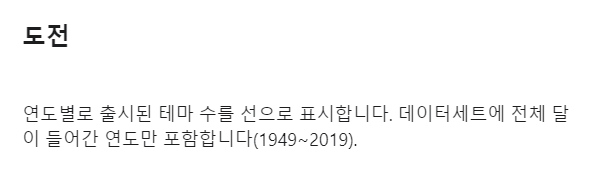

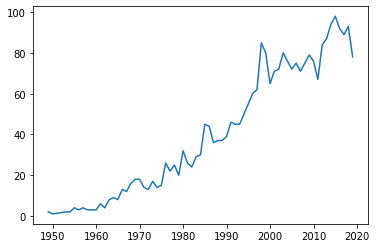

In [69]:
plt.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2]);

    - 차트에서 레고가 1990년대 중반까지 꽤 일관되게 점점 많은 테마를 추가했음을 알 수 있음
    - 이후 2010년 초반까지 약 10년 동안 테마의 수는 정체되어 있음

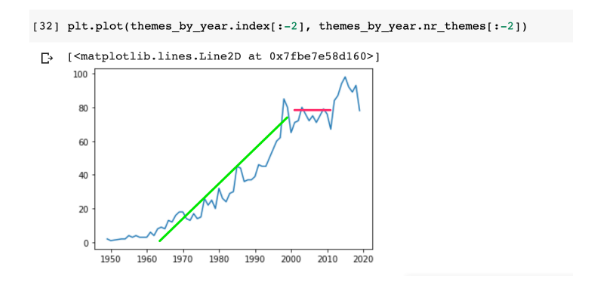

## `617강`
축이 다른 선형 차트를 중첩하기

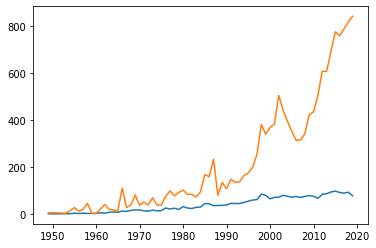

In [71]:
plt.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2])
plt.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2]);

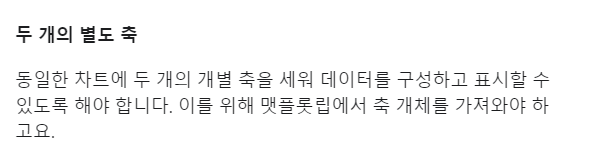

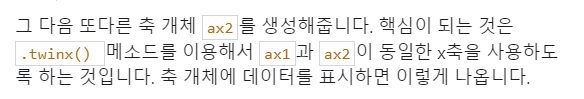

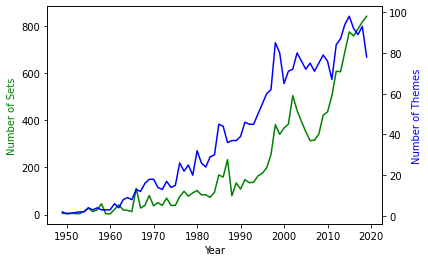

In [74]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2], color='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2], color='b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='blue');

## `618강`
산점도: 레고 세트 당 평균 부품 개수

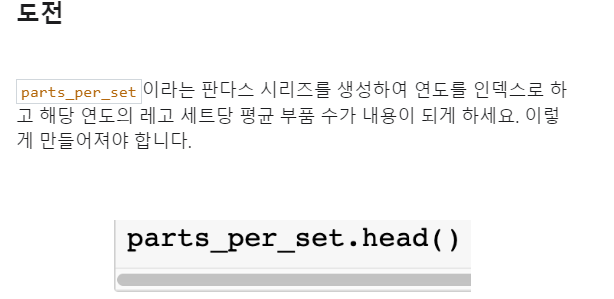
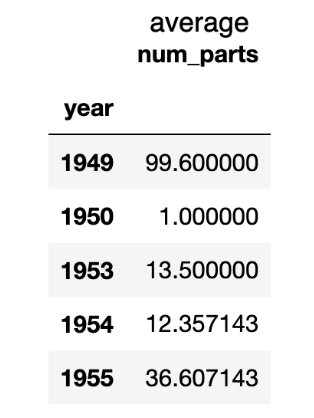
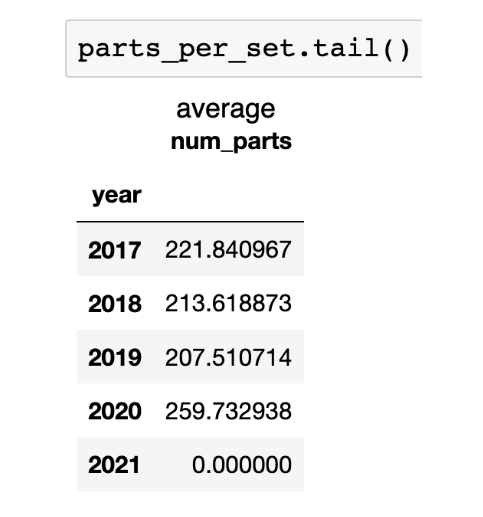

In [78]:
parts_per_set = set_df.groupby('year').mean()[['num_parts']]
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [79]:
parts_per_set.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


**groupby와 agg 같이 사용**

In [80]:
parts_per_set = sets.groupby('year').agg({'num_parts':pd.Series.mean})
parts_per_set

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


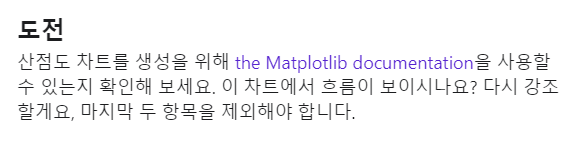

https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html

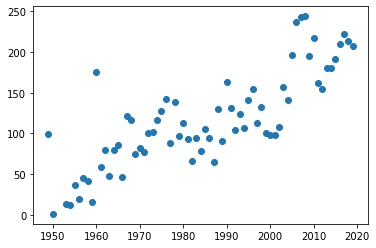

In [81]:
plt.scatter(parts_per_set.index[:-2], parts_per_set['num_parts'][:-2])

    - 차트에서 평균 부품 수를 기준으로 레고 세트의 크기와 복잡도가 증가하는 흐름을 확실하게 파악할 수 있음
    - 2010년대에는 평균 세트에 약 200개의 개별 부품이 들어 있었는데, 이는 대략 1960년대 레고 세트에 들어있던 것의 두 배

## `619강`
연관 데이터베이스 스키마: 기본키와 외래키

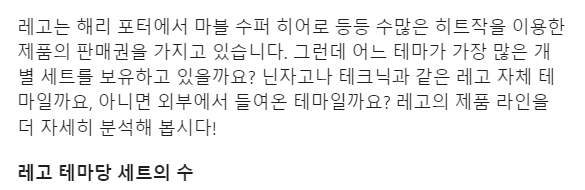

In [82]:
set_theme_counts = set_df['theme_id'].value_counts()
set_theme_counts

158    753
501    656
494    398
435    356
503    329
      ... 
373      1
515      1
531      1
370      1
380      1
Name: theme_id, Length: 571, dtype: int64

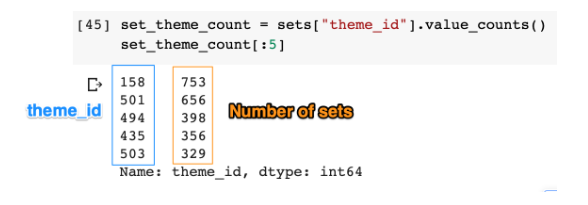

**노트북 안의 데이터베이스 스키마 표현하기**

<img src='assets/rebrickable_schema.png'>

In [83]:
# <img src="https://i.imgur.com/Sg4lcjx.png">

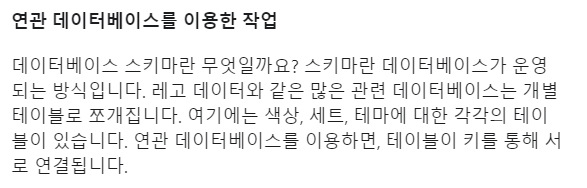

In [85]:
themes = pd.read_csv('data/themes.csv')
themes

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0


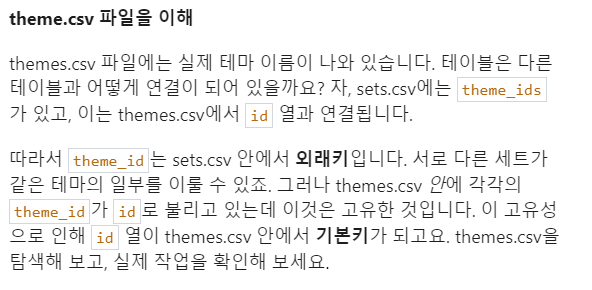

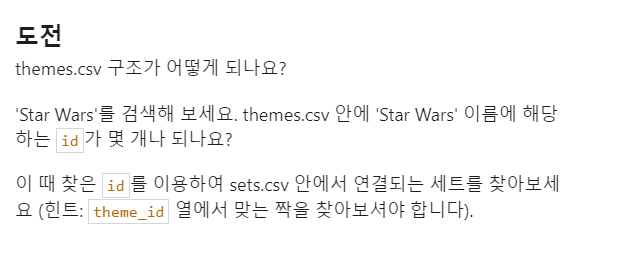

In [86]:
themes_df = themes.copy()
themes_df

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0


In [89]:
themes_df[themes_df['name']=='Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [96]:
Star_Wars = themes_df[themes_df['name']=='Star Wars']['id'].values.tolist()
Star_Wars

[18, 158, 209, 261]

In [99]:
set_df[set_df['theme_id'].isin(Star_Wars)]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [100]:
set_df[set_df['theme_id']==158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [101]:
set_df[set_df['theme_id']==209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


## `620강`
데이터프레임을 병합하여 막대 차트를 만드는 방법

In [102]:
set_theme_count = set_df['theme_id'].value_counts()
set_theme_count[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

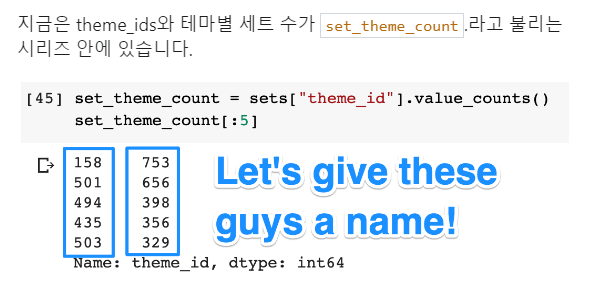

In [104]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index, 'set_count':set_theme_count.values})
set_theme_count

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,373,1
567,515,1
568,531,1
569,370,1


In [106]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


**막대 차트 만들기**

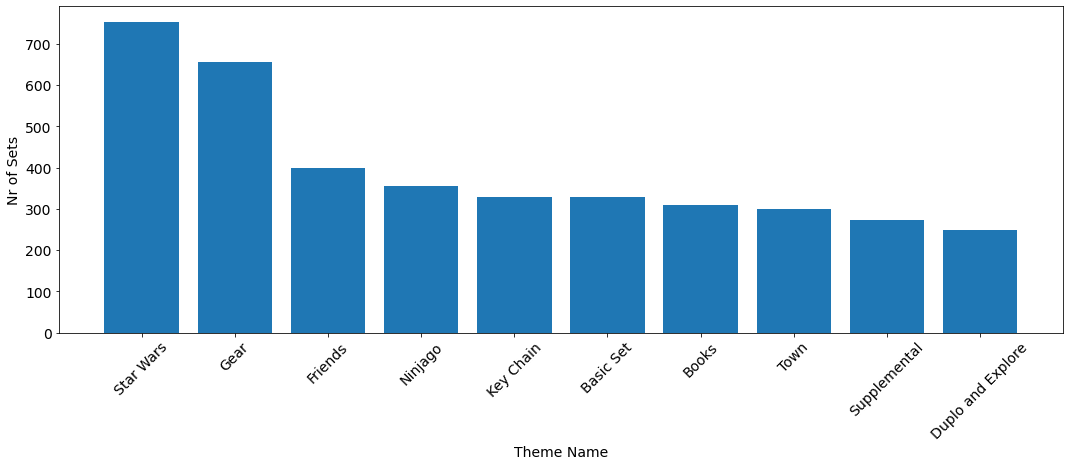

In [113]:
plt.figure(figsize=(18,6))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
plt.bar(merged_df.name[:10], merged_df.set_count[:10]);

## `621강`
핵심 학습내용 및 요약

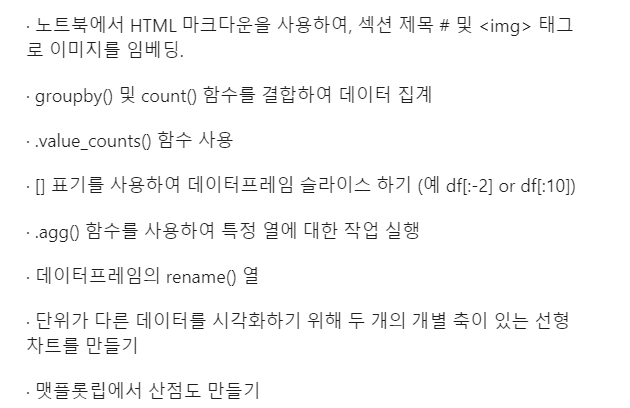
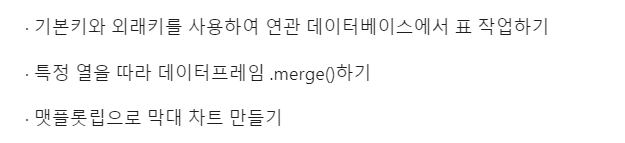